In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

data=pd.read_csv("Placement_Data_Full_Class.csv")

In [2]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


<AxesSubplot:>

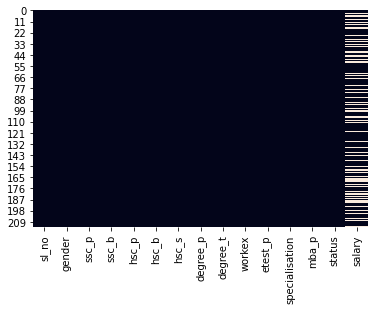

In [3]:
sns.heatmap(data.isnull(), cbar=False )

In [4]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
val=data['salary'].isnull()

In [7]:
data=data.replace(np.nan,0)

<AxesSubplot:>

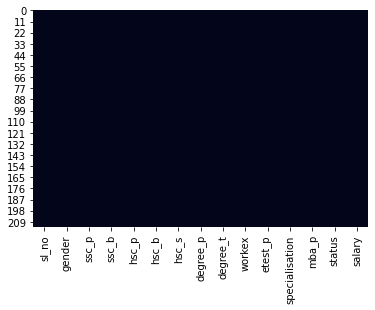

In [8]:
sns.heatmap(data.isnull(), cbar=False )

In [9]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<AxesSubplot:xlabel='status', ylabel='count'>

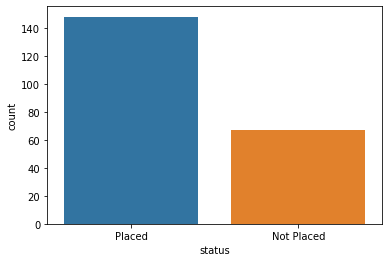

In [10]:
sns.countplot(x='status',data=data)

<AxesSubplot:xlabel='status', ylabel='count'>

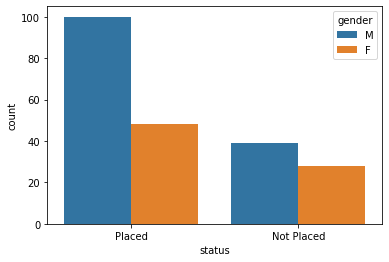

In [11]:
sns.countplot(x='status',hue='gender',data=data)

<AxesSubplot:ylabel='Frequency'>

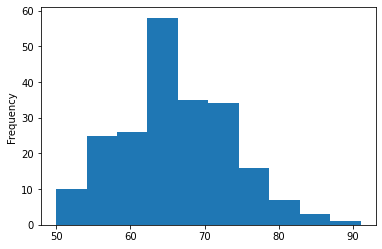

In [12]:
data['degree_p'].plot.hist()

<AxesSubplot:xlabel='status', ylabel='count'>

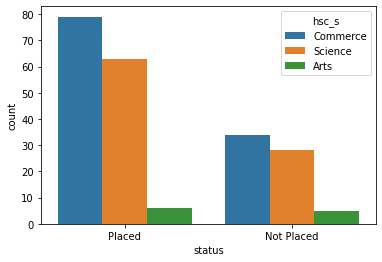

In [13]:
sns.countplot(x='status',hue='hsc_s',data=data)

<AxesSubplot:xlabel='status', ylabel='count'>

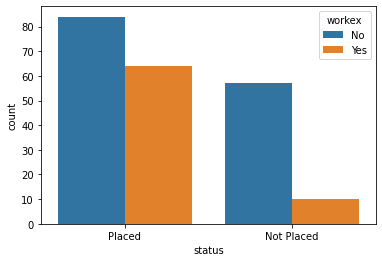

In [14]:
sns.countplot(x='status',hue='workex',data=data)

<AxesSubplot:ylabel='Frequency'>

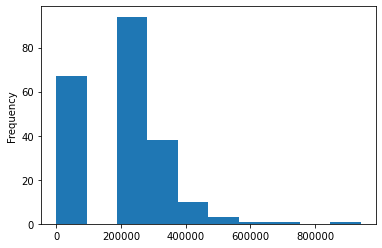

In [15]:
data['salary'].plot.hist()

In [16]:
gen=pd.get_dummies(data['gender'],drop_first=True)

In [17]:
ssc_b=pd.get_dummies(data['ssc_b'],drop_first=True)

In [18]:
hsc_s=pd.get_dummies(data['hsc_s'],drop_first=True)

In [19]:
hsc_b=pd.get_dummies(data['hsc_b'],drop_first=True)

In [20]:
deg=pd.get_dummies(data['degree_t'],drop_first=True)

In [21]:
work=pd.get_dummies(data['workex'],drop_first=True)

In [22]:
spec=pd.get_dummies(data['specialisation'],drop_first=True)

In [23]:
y=pd.get_dummies(data['status'],drop_first=True)

In [24]:
X=data.drop(['sl_no','gender','ssc_b','hsc_s','hsc_b','degree_t','workex','specialisation','salary','status'],axis=1)

In [25]:
pd.concat([X,gen,ssc_b,hsc_s,hsc_b,deg,work,spec],axis=1)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,M,Others,Commerce,Science,Others,Others,Sci&Tech,Yes,Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,1,1,0,1,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,0,1,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,1,0,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,1,0,1,0,0,0,0
211,58.00,60.00,72.00,74.0,53.62,1,1,0,1,1,0,1,0,0
212,67.00,67.00,73.00,59.0,69.72,1,1,1,0,1,0,0,1,0
213,74.00,66.00,58.00,70.0,60.23,0,1,1,0,1,0,0,0,1


In [26]:
y=y['Placed']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [28]:
lm=LogisticRegression(max_iter=10000)
lm.fit(X_train,y_train)
y_predict=lm.predict(X_test)

In [29]:
confusion_matrix(y_predict,y_test)

array([[13,  5],
       [10, 37]], dtype=int64)

In [30]:
xp=X_test.index
yt=y_test
yp=y_predict

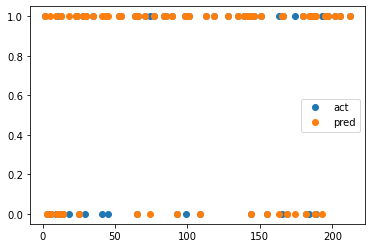

In [31]:
plt.plot(xp,yt,'o',label='act')
plt.plot(xp,yp,'o',label='pred')
plt.legend()
plt.show()

In [32]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [33]:
data2=pd.read_csv('Placement_Data_Full_Class.csv')

In [34]:
data2=data2.dropna()

<AxesSubplot:>

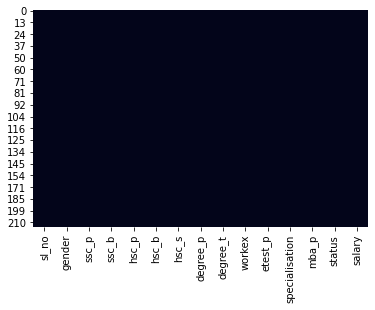

In [35]:
sns.heatmap(data2.isnull(),cbar=False)

In [36]:
data2.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [37]:
data2

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [38]:
gen2=pd.get_dummies(data2['gender'],drop_first=True)

In [39]:
ssc_b2=pd.get_dummies(data2['ssc_b'],drop_first=True)

In [40]:
hsc_b2=pd.get_dummies(data2['hsc_b'],drop_first=True)

In [41]:
hsc_s2=pd.get_dummies(data2['hsc_s'],drop_first=True)

In [42]:
deg2=pd.get_dummies(data2['degree_t'],drop_first=True)

In [43]:
work2=pd.get_dummies(data2['workex'],drop_first=True)

In [44]:
spe2=pd.get_dummies(data2['specialisation'],drop_first=True)

In [45]:
y2=data2['salary']

In [46]:
X2=data2.drop(['sl_no','gender','ssc_b','hsc_s','hsc_b','degree_t','workex','specialisation','salary','status'],axis=1)

In [47]:
X2=pd.concat([X2,gen2,ssc_b2,hsc_s2,hsc_b2,deg2,work2,spe2],axis=1)

In [48]:
X2_tr,X2_te,y2_tr,y2_te=train_test_split(X2,y2,test_size=0.25, random_state=2)

In [69]:
y2_te=y2_te.sort_index()
X2_te=X2_te.sort_index()
X2_tr=X2_tr.sort_index()
y2_tr=y2_tr.sort_index()

In [71]:
reg=LinearRegression()
reg.fit(X2_tr,y2_tr)
pred2=reg.predict(X2_te)
pred3=reg.predict(X2_tr)

In [72]:
xp2=X2_te.index
xp3=X2_tr.index

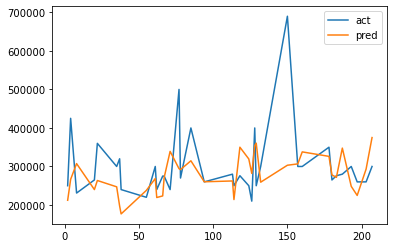

In [74]:
plt.plot(xp2,y2_te,label='act')
plt.plot(xp2,pred2,label='pred')
plt.legend()

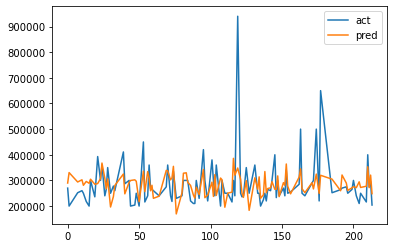

In [75]:
plt.plot(xp3,y2_tr,label='act')
plt.plot(xp3,pred3,label='pred')
plt.legend()